In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [113]:
df=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [63]:
df.shape

(42000, 785)

In [64]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
20084,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
import matplotlib.pyplot as plt

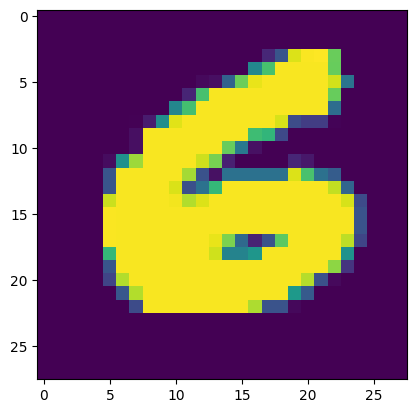

In [66]:
plt.imshow(df.iloc[24218, 1:].values.reshape(28,28))

In [146]:
X=df.iloc[:, 1:]
y=df.iloc[:, 0]

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [149]:
X_train.shape

(33600, 784)

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
knn=KNeighborsClassifier()

In [152]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [153]:
y_pred=knn.predict(X_test)

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
accuracy_score(y_test, y_pred)

0.9680952380952381

In [156]:
from sklearn.preprocessing import StandardScaler

In [157]:
scaler=StandardScaler()

In [158]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
from sklearn.decomposition import PCA

In [160]:
pca=PCA(n_components=200)

In [161]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [162]:
X_train_trf.shape

(33600, 200)

In [163]:
knn=KNeighborsClassifier()

In [164]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [165]:
y_pred=knn.predict(X_test_trf)

In [166]:
accuracy_score(y_test, y_pred)

0.9498809523809524

for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))

In [167]:
X_train_trf

array([[ 7.08555987,  2.60519751,  0.05080291, ...,  1.26013568,
        -0.04115221,  0.47349892],
       [11.08323748,  2.20072411, -1.31381332, ...,  0.82591936,
         0.36080396, -0.49784816],
       [-2.34528884,  7.2080612 ,  0.05657823, ..., -0.52612758,
         0.75745491,  1.12721108],
       ...,
       [-5.04390495,  5.86144964, -3.45400449, ...,  0.39880882,
        -0.23950042,  0.76974135],
       [11.75653494, -6.2760012 , -4.46585173, ..., -0.35768842,
         0.0194564 , -0.02937438],
       [-3.86602205,  4.80718729, -3.15619362, ..., -0.06255438,
         0.24086744,  0.86442165]])

In [168]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [169]:
X_train_trf

array([[ 7.08554229,  2.60528558],
       [11.08326858,  2.20057044],
       [-2.34530412,  7.20827341],
       ...,
       [-5.04389396,  5.86131809],
       [11.75655663, -6.2761744 ],
       [-3.86600894,  4.80705295]])

In [172]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [173]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [175]:
X_train_trf

array([[ 7.08556302,  2.60544955,  0.05082922],
       [11.08324205,  2.20070088, -1.31359268],
       [-2.34533967,  7.20865979,  0.05646226],
       ...,
       [-5.04391526,  5.86163213, -3.45385404],
       [11.75656124, -6.27628422, -4.46599994],
       [-3.86603348,  4.80725258, -3.15606389]])

In [176]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [177]:
pca.explained_variance_

array([40.64115119, 29.26140839, 26.64277376])

In [179]:
pca.components_.shape

(3, 784)

In [180]:
pca.explained_variance_ratio_

array([0.05830695, 0.04198069, 0.03822379])

In [181]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [182]:
pca.explained_variance_ratio_

array([5.83069464e-02, 4.19806853e-02, 3.82237890e-02, 2.99115159e-02,
       2.58748632e-02, 2.27008412e-02, 1.99181162e-02, 1.79797980e-02,
       1.59385496e-02, 1.44560523e-02, 1.38562105e-02, 1.24492919e-02,
       1.15119932e-02, 1.13424713e-02, 1.07110491e-02, 1.02951072e-02,
       9.66728711e-03, 9.47629549e-03, 9.28196326e-03, 9.03792228e-03,
       8.53649059e-03, 8.26288062e-03, 7.94170437e-03, 7.63846377e-03,
       7.41556539e-03, 7.11610601e-03, 7.04734462e-03, 6.81501263e-03,
       6.44113258e-03, 6.29955011e-03, 6.23008130e-03, 6.14309357e-03,
       5.93474807e-03, 5.81338525e-03, 5.78103546e-03, 5.62246157e-03,
       5.51424377e-03, 5.31447897e-03, 5.16496129e-03, 5.04507920e-03,
       4.94783916e-03, 4.89615197e-03, 4.72839588e-03, 4.70319591e-03,
       4.58153617e-03, 4.54549102e-03, 4.52189700e-03, 4.47588589e-03,
       4.36530486e-03, 4.28496360e-03, 4.14376740e-03, 4.10474105e-03,
       4.06067246e-03, 4.00513090e-03, 3.95755427e-03, 3.82446042e-03,
      

In [184]:
pca.components_.shape

(784, 784)

In [185]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05830695, 0.10028763, 0.13851142, 0.16842294, 0.1942978 ,
       0.21699864, 0.23691676, 0.25489656, 0.2708351 , 0.28529116,
       0.29914737, 0.31159666, 0.32310865, 0.33445112, 0.34516217,
       0.35545728, 0.36512457, 0.37460086, 0.38388283, 0.39292075,
       0.40145724, 0.40972012, 0.41766182, 0.42530029, 0.43271585,
       0.43983196, 0.4468793 , 0.45369432, 0.46013545, 0.466435  ,
       0.47266508, 0.47880817, 0.48474292, 0.49055631, 0.49633734,
       0.5019598 , 0.50747405, 0.51278853, 0.51795349, 0.52299857,
       0.52794641, 0.53284256, 0.53757095, 0.54227415, 0.54685569,
       0.55140118, 0.55592307, 0.56039896, 0.56476427, 0.56904923,
       0.573193  , 0.57729774, 0.58135841, 0.58536354, 0.5893211 ,
       0.59314556, 0.5969215 , 0.6006662 , 0.60430766, 0.60791184,
       0.61141996, 0.61491038, 0.61834564, 0.62177429, 0.6251811 ,
       0.62851747, 0.63182195, 0.63504067, 0.63824855, 0.64141191,
       0.64453498, 0.6476157 , 0.65067708, 0.65371506, 0.65673

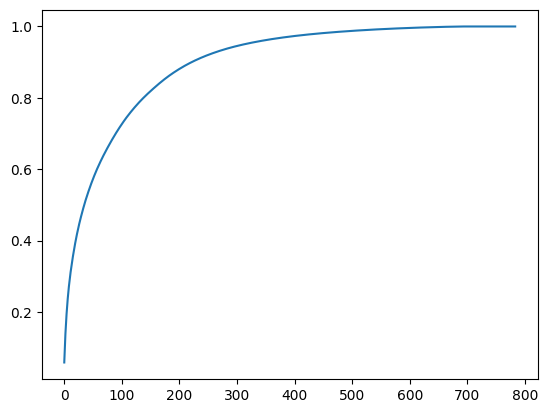

In [186]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))